<a href="https://colab.research.google.com/github/flozle/222542Y_Assignment/blob/master/Copy_of_IT3102_24S1_Practical_Assignment_Student_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT3102 Practical Assignment 2024S1

This individual assignment contributes to 45% of the module's overall grade. Explore the provided dataset, fill in any missing code and answer all questions in the assignment. The assignment is intended to be completed in Amazon Sagemaker.

Any use of AI-generated content should be cited.

The goals of this notebook are:
- Step 1: Problem formulation and data collection (5%)
- Step 2: Data preprocessing and visualization  (15%)
- Step 3: Model training and evaluation (15%)
- Step 4: Hyperparameter optimization (5%)
- Project review (5%)


# Problem: Predicting Student Performance

## Introduction to business scenario

You are working for a school which wants to help its student improve their academic results in mathematics. The school wishes to, at the start of the year, identify students at risk of performing poorly in the subject in order to provide early interventions through additional support such as counselling and extra classess.

You are considering the use of machine learning (ML) to identify students at risk of failing the mathematics module. You are provided with survey data on the students' background and their academic results.  

The school wishes to identify students who could be scoring less then 60 as possible candidates for additional support.

## About this dataset

The data used in the assignment is adapted from a research on student achievement in a school. The data attributes include the student grades from the end of year examinations, demographic, social and school related features of a particular year.


### Features

#### Attributes:
1. index - record number
2. Admin no. - school account id of student
2. Gender - student's sex
3. Ethnic Grps - student's ethnic group
4. ParentEduc - highest educational level of either parent
5. LunchType - type of lunch taken by the student
6. TestPrep - status of student taking tuition/test preparation class
7. ParentMaritalStatus - parent marital status
8. PracticeSport - frequency of sports participation by student
9. IsFirstChild - whether student is the first child or not
10. NrSiblings - number of siblings
11. TransportMeans - means of transport used to go to school
12. WklyStudyHours - hours spent on school work and study per week
13. MathScore - End of year mathematics examination score (0-100)
14. ReadingScore - End of year reading examination score (0-100)
15. WritingScore - End of year writing examination score (0-100)


## Citation:

Source: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores


# Step 1: Problem formulation and data collection (5%)

**Question**:

### 1. Determine if machine learning (ML) is an appropriate solution to deploy for this scenario. Give the reason for your answer.

### 2. State the business problem and formulate the machine learning problem.

### 3. Identify the type of ML problem that you're working with.

### Setup

Now that you have decided where you want to focus your attention, you will set up this lab so that you can start solving the problem.

**Note:** This notebook was created and tested on an `ml.m4.xlarge` notebook instance with 25 GB storage.

In [ ]:
import os
from pathlib import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
instance_type='ml.m4.xlarge'

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Step 2: Data preprocessing and visualization  (15%)

Explore and visualize your data to better understand it.

* Import the necessary libraries and read the data into a pandas DataFrame.
* Look for the shape of the dataset and explore your columns and the types of columns that you will work with (numerical, categorical).
* Consider performing basic statistics on the features to get a sense of feature means and ranges.
* Examine your target column closely, and determine its distribution.


Start by bringing in the dataset to this notebook environment.

#### Load sample CSV file

Examine the data from the single CSV file.

**Question**: Read the CSV file

In [ ]:
# DONE
# Enter your code here to read the CSV file
dataset = pd.read_csv('data.csv')
dataset

,Unnamed: 0.1,Unnamed: 0,Admin no.,Gender,Ethnic Grp.,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,,.1
0,0,0,87998421Bw,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,NaN,NaN
1,1,1,94819883Si,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,NaN,NaN
2,2,2,45254549Ff,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,NaN,NaN
3,3,3,52853354Dz,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,NaN,NaN
4,4,4,18205089Yc,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,30636,816,95955976By,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,NaN,NaN
30637,30637,890,22455358Wt,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,NaN,NaN
30638,30638,911,31633050Zz,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,NaN,NaN
30639,30639,934,77969373Sy,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,NaN,NaN


**Question**: Print the row and column length in the dataset.


In [ ]:
# DONE
# Enter your code here to read the CSV file

print(f'Rows and columns in one csv file is {dataset.shape}')

Rows and columns in one csv file is (30641, 19)


**Question**: Print the first 10 rows of the dataset.  


In [ ]:
# DONE
# Enter your code here
dataset.head(10)

,Unnamed: 0.1,Unnamed: 0,Admin no.,Gender,Ethnic Grp.,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,,.1
0,0,0,87998421Bw,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,NaN,NaN
1,1,1,94819883Si,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,NaN,NaN
2,2,2,45254549Ff,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,NaN,NaN
3,3,3,52853354Dz,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,NaN,NaN
4,4,4,18205089Yc,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,NaN,NaN
5,5,5,23179532Il,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,NaN,NaN
6,6,6,64308999Na,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89,NaN,NaN
7,7,7,65204191Yu,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39,NaN,NaN
8,8,8,98927277Aw,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68,NaN,NaN
9,9,9,36608287Bo,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50,NaN,NaN


**Question**: Print all the columns in the dataset.

In [ ]:
# DONE
# Enter your code here

print(f'The column names are :')
print('#########')
for col in dataset.columns:  # **ENTER YOUR CODE**
    print(col)


The column names are :
#########
Unnamed: 0.1
Unnamed: 0
Admin no.
Gender
Ethnic Grp.
ParentEduc
LunchType
TestPrep
ParentMaritalStatus
PracticeSport
IsFirstChild
NrSiblings
TransportMeans
WklyStudyHours
MathScore
ReadingScore
WritingScore
 
 .1


**Question:** Is there any missing values? Enter the necessary code to find out

In [ ]:
# DONE
# look for missing values (Enter code here)
print(dataset.isnull().sum())

Unnamed: 0.1               0
Unnamed: 0                 0
Admin no.                  0
Gender                     0
Ethnic Grp.             1840
ParentEduc              1845
LunchType                  0
TestPrep                1830
ParentMaritalStatus     1190
PracticeSport            631
IsFirstChild             904
NrSiblings              1572
TransportMeans          3134
WklyStudyHours           955
MathScore                  0
ReadingScore               0
WritingScore               0
                       30641
 .1                    30641
dtype: int64


**Questions**   

1. What are all values of "LunchType" included in the dataset?  
2. What is the range of score for "WritingScore" in the dataset?   



In [ ]:
# DONE
# Enter your code here

print("The lunch type covered in this dataset are: ", dataset.LunchType.unique())
print("The range of writing score is :" , dataset.WritingScore.min(), " to ", dataset.WritingScore.max())


The lunch type covered in this dataset are:  ['standard' 'free/reduced']
The range of writing score is : 4  to  100


**Question:** As the school wishes to make a prediction before any assessment is being done, which are the columns that can possibly be removed?

In [ ]:
# DONE
# Enter your code here (for removing columns)
dataset = dataset[dataset.columns[dataset.isnull().mean() < 0.9]]
dataset = dataset.drop(["Unnamed: 0.1", "Unnamed: 0", "Admin no."], axis=1)
dataset

,Gender,Ethnic Grp.,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


**Question:** Prepare the target column for the task of identifying students at risk of failing maths/require additional support.

Explain how you would handle the rows with missing values and implement your decision.

In [ ]:
# DONE
# Enter your code here
# handle rows with missing vlaues
dataset = dataset.dropna()

# clean data (standerization)
dataset.IsFirstChild = dataset.IsFirstChild.map(lambda x: x.lower())
dataset = dataset[dataset['MathScore'] > 0]

# add target column
dataset["target"] = dataset["MathScore"].apply(lambda x: "Not at risk" if x < 60 else "At risk")

for i in dataset.columns:
  print(i)
  print(dataset[i].unique())


Gender
['female' 'male']
Ethnic Grp.
['group B' 'group C' 'group D' 'group A' 'group E']
ParentEduc
["master's degree" 'some college' "associate's degree" 'high school'
 'some high school' "bachelor's degree" 'associate degree'
 'bachelor degree']
LunchType
['standard' 'free/reduced']
TestPrep
['none' 'completed']
ParentMaritalStatus
['single' 'married' 'widowed' 'divorced']
PracticeSport
['sometimes' 'regularly' 'never']
IsFirstChild
['yes' 'no']
NrSiblings
[4. 0. 1. 3. 2. 5. 7. 6.]
TransportMeans
['school_bus' 'private']
WklyStudyHours
['< 5' '5 - 10' '> 10']
MathScore
[ 87  76  73  85  41  65  40  66  80  48  18  46  50  75  69  70  56  51
  77  58  53  63  88  33  84  52  62  59  45  61  39  64  42  60  49  74
  71  57  81  79  68  72  54  47  98  55  82  86  67  90  21 100  96  91
  44  99  83  89  93  94  78  29  23  35  92  26  37  28  95  43  30  36
  97  32   8  38  34  31  27  25  16  22  17  15  11  24  19  12  13   9
  10   7  14  20]
ReadingScore
[ 93  78  84  43  64  52  

#### Run the following code.

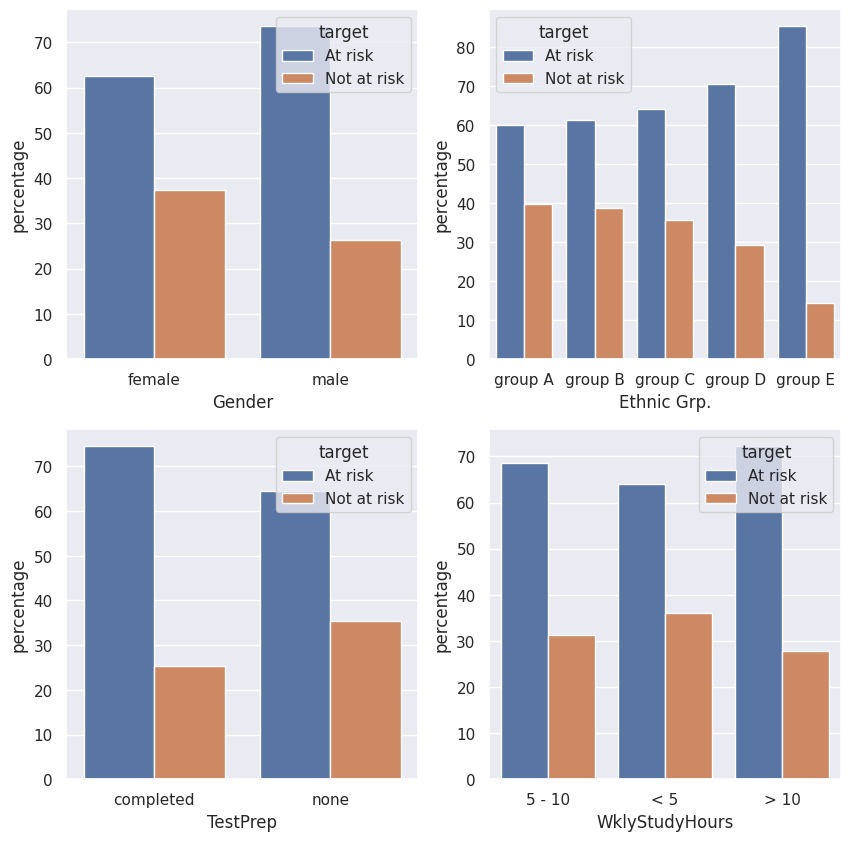

In [ ]:
from matplotlib import rcParams

viz_columns = ['Gender', 'Ethnic Grp.', 'TestPrep', "WklyStudyHours"]
fig, axes = plt.subplots(2, 2, figsize=(10,10), squeeze=False)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = dataset.groupby(column)['target'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="target", data=temp, ax=ax)

plt.show()

**Questions**

Using the data from the previous charts, answer these questions:

- Explain the relationship you observed between a student possibly needing additional Math support with
1. Gender
2. Ethnic Grp.
2. TestPrep
3. WklyStudyHours

**Question**: Create the bar plot for the frequency of classes in final_grade. What can you deduce from the bar plot about the ratio of *pass* versus *fail*?

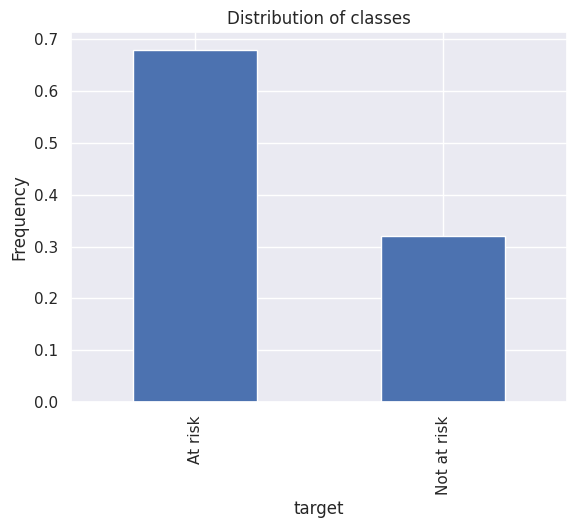

In [ ]:
# DONE
# Enter your code here

# Pass/Fail Distribution

(dataset.groupby(dataset.target).size()/len(dataset) ).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()


### Features

Explore the columns and their specific types.

**Question** Prepare the data for model training


To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function.

Proceed to complete the necessary processing for the data (eg catgorical via one-hot encoding etc)

In [ ]:
# Enter your code here

categorical_columns = ["Gender", "Ethnic Grp.", "ParentEduc", "LunchType", "TestPrep", "ParentMaritalStatus", "PracticeSport", "IsFirstChild", "TransportMeans", "WklyStudyHours"]
data = pd.concat([dataset, pd.get_dummies(dataset[categorical_columns])])
data
#for c in categorical_columns:
#    dataset[c] = dataset[c].astype('category') # Enter your code here



,Gender,Ethnic Grp.,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,...,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_no,IsFirstChild_yes,TransportMeans_private,TransportMeans_school_bus,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,False,True,False,False,True,True,False,False
30636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,True,True,False,False,True,True,False,False
30637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,False,True,False,True,False,True,False,False
30639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,False,True,False,False,True,True,False,False


#### Check the length of the dataset and the new columns.

In [ ]:
df_temp.dtypes

**Question:** Shift the 'target' column to the last column before we proceed to do model training.


In [ ]:
# Enter your code here


**Question** Observe the correlation between the features and target.

Which of the feature(s) has the highest correlation?


In [ ]:
# Enter your code here


## <span style="color:red"> End of Step 2</span>

Save the project file to your local computer as a backup at this point. Follow these steps:

1. In the file explorer on the left, right click the notebook you are working on.

2. Select **Download**, and save the file locally.  

This downloads the current notebook to the default download folder on your computer.

# Step 3: Model training and evaluation (15%)

You must include some preliminary steps when you convert the dataset from a DataFrame to a format that a machine learning algorithm can use. For Amazon SageMaker, you must perform these steps:

1. Split the data into `train_data`, `validation_data`, and `test_data` by using `sklearn.model_selection.train_test_split`.  

2. Convert the dataset to an appropriate file format that the Amazon SageMaker training job can use. This can be either a CSV file or record protobuf. For more information, see [Common Data Formats for Training](https://docs.aws.amazon.com/sagemaker/latest/dg/cdf-training.html).  

3. Upload the data to your S3 bucket. If you haven't created one before, see [Create a Bucket](https://docs.aws.amazon.com/AmazonS3/latest/gsg/CreatingABucket.html).  

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
def split_data(data):
    train, test_and_validate = train_test_split(data, test_size=0.2, random_state=42, stratify=data['target'])
    test, validate = train_test_split(test_and_validate, test_size=0.5, random_state=42, stratify=test_and_validate['target'])
    return train, validate, test

In [ ]:
train, validate, test = split_data(df_temp)
print(train['target'].value_counts())
print(test['target'].value_counts())
print(validate['target'].value_counts())

**Sample answer**
```
0.0    1033570
1.0     274902
Name: target, dtype: int64
0.0    129076
1.0     34483
Name: target, dtype: int64
0.0    129612
1.0     33947
Name: target, dtype: int64
```

### Baseline classification model

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression # Import Logistic Regression Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Logistic Regression

#### <span style="color: blue;">Fill in the missing code.</span>

In [ ]:
# Enter your code here


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(<CODE>))


## Applying k-Fold Cross Validation

In [ ]:
# Enter your code here

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = <CODE>, X = <CODE>, y = <CODE>, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


## Decision Tree

Use the DecisionTreeClassifier from sklearn, once with `max_depth = 6` and the second time with `max_depth` at default of `None`

#### <span style="color: blue;">Fill in the missing code.</span>

In [ ]:
# Enter your code here


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(<CODE>))

## Applying k-Fold Cross Validation

In [ ]:
# Enter your code here

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = <CODE>, X = <CODE>, y = <CODE>, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


###
#### <span style="color: blue;">Answer the following question</span>

1. Would accuracy be a significant measure for this machine learning problem? Given your business situation and goals, which metric(s) is most important for you to consider here? Why?

2. Describe and explain the different metric values observed when max_depth = None is used instead of max_depth = 6?

3. Between Decision Tree and Logistic Regression, which would you choose and why?

## Sagemaker Linear Learner

In [ ]:
import sagemaker
from sagemaker.serializers import CSVSerializer
from sagemaker.amazon.amazon_estimator import RecordSet
import boto3

# Instantiate the LinearLearner estimator object with 1 ml.m4.xlarge

classifier_estimator = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                              instance_count=1,
                                              instance_type='ml.m4.xlarge',
                                              predictor_type='binary_classifier',
                                              binary_classifier_model_selection_criteria = 'cross_entropy_loss')

Linear learner accepts training data in protobuf or CSV content types. It also accepts inference requests in protobuf, CSV, or JavaScript Object Notation (JSON) content types. Training data has features and ground-truth labels, but the data in an inference request has only features.

In a production pipeline, AWS recommends converting the data to the Amazon SageMaker protobuf format and storing it in Amazon S3. To get up and running quickly, AWS provides the `record_set` operation for converting and uploading the dataset when it's small enough to fit in local memory. It accepts NumPy arrays like the ones you already have, so you will use it for this step. The `RecordSet` object will track the temporary Amazon S3 location of your data. Create train, validation, and test records by using the `estimator.record_set` function. Then, start your training job by using the `estimator.fit` function.

#### <span style="color: blue;">Fill in the missing code.</span>

In [ ]:
# Enter your code here

### Create train, validate, and test records
train_records = classifier_estimator.record_set(train.values[<code>].astype(np.float32), train.values[<code>].astype(np.float32), channel='train')
val_records = classifier_estimator.record_set(validate.values[<code>].astype(np.float32), validate.values[<code>].astype(np.float32), channel='validation')
test_records = classifier_estimator.record_set(test.values[<code>].astype(np.float32), test.values[<code>].astype(np.float32), channel='test')

In [ ]:
# Enter your code here

### Fit the classifier
classifier_estimator.fit([<code>])

## Model evaluation
In this section, you will evaluate your trained model.

First, examine the metrics for the training job:

In [ ]:
sagemaker.analytics.TrainingJobAnalytics(classifier_estimator._current_job_name,
                                         metric_names = ['test:objective_loss',
                                                         'test:binary_f_beta',
                                                         'test:precision',
                                                         'test:recall']
                                        ).dataframe()

Next, setup some functions with that will help load the test data into S3 and perform a prediction using the batch prediction function. Using batch prediction will help keep costs to a minimum as the instances will only run for the duration of performing predictions on the test data supplied.

**Note:** replace `<LabBucketName>` with the name of the lab bucket created during the lab setup.

In [ ]:
# Enter your code here

import io

#bucket='<LabBucketName>'
#########################
bucket= <code>
#########################

prefix='student-linear'
train_file='student_train.csv'
test_file='student_test.csv'
validate_file='student_validate.csv'
whole_file='data.csv'
s3_resource = boto3.Session().resource('s3')

def upload_s3_csv(filename, folder, dataframe):
    csv_buffer = io.StringIO()
    dataframe.to_csv(csv_buffer, header=False, index=False )
    s3_resource.Bucket(bucket).Object(os.path.join(prefix, folder, filename)).put(Body=csv_buffer.getvalue())

In [ ]:
def batch_linear_predict(test_data, estimator):
    batch_X = test_data.iloc[:,0:-1];
    batch_X_file='batch-in.csv'
    upload_s3_csv(batch_X_file, 'batch-in', batch_X)

    batch_output = "s3://{}/{}/batch-out/".format(bucket,prefix)
    batch_input = "s3://{}/{}/batch-in/{}".format(bucket,prefix,batch_X_file)

    classifier_transformer = estimator.transformer(instance_count=1,
                                           instance_type='ml.m4.xlarge',
                                           strategy='MultiRecord',
                                           assemble_with='Line',
                                           output_path=batch_output)

    classifier_transformer.transform(data=batch_input,
                             data_type='S3Prefix',
                             content_type='text/csv',
                             split_type='Line')

    classifier_transformer.wait()

    s3 = boto3.client('s3')
    obj = s3.get_object(Bucket=bucket, Key="{}/batch-out/{}".format(prefix,'batch-in.csv.out'))
    target_predicted_df = pd.read_json(io.BytesIO(obj['Body'].read()),orient="records",lines=True)
    return test_data.iloc[:,-1], target_predicted_df.iloc[:,0]

To run the predictions on the test dataset, run the `batch_linear_predict` function on your test dataset.

In [ ]:
# Enter your code here
test_labels, target_predicted = batch_linear_predict(<code>, <code>)


To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    matrix = confusion_matrix(test_labels, target_predicted)
    df_confusion = pd.DataFrame(matrix)
    colormap = sns.color_palette("BrBG", 10)
    sns.heatmap(df_confusion, annot=True, fmt='.2f', cbar=None, cmap=colormap)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.show()


In [ ]:
from sklearn import metrics

def plot_roc(test_labels, target_predicted):
    TN, FP, FN, TP = confusion_matrix(test_labels, target_predicted).ravel()
    # Sensitivity, hit rate, recall, or true positive rate
    Sensitivity  = float(TP)/(TP+FN)*100
    # Specificity or true negative rate
    Specificity  = float(TN)/(TN+FP)*100
    # Precision or positive predictive value
    Precision = float(TP)/(TP+FP)*100
    # Negative predictive value
    NPV = float(TN)/(TN+FN)*100
    # Fall out or false positive rate
    FPR = float(FP)/(FP+TN)*100
    # False negative rate
    FNR = float(FN)/(TP+FN)*100
    # False discovery rate
    FDR = float(FP)/(TP+FP)*100
    # Overall accuracy
    ACC = float(TP+TN)/(TP+FP+FN+TN)*100

    print("Sensitivity or TPR: ", Sensitivity, "%")
    print( "Specificity or TNR: ",Specificity, "%")
    print("Precision: ",Precision, "%")
    print("Negative Predictive Value: ",NPV, "%")
    print( "False Positive Rate: ",FPR,"%")
    print("False Negative Rate: ",FNR, "%")
    print("False Discovery Rate: ",FDR, "%" )
    print("Accuracy: ",ACC, "%")
    print("Validation AUC", metrics.roc_auc_score(test_labels, target_predicted) )

    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted)
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r')
    if np.isnan(thresholds[-1]) or np.isinf(thresholds[-1]) or np.isnan(thresholds[0]) or np.isinf(thresholds[0]):
        thresholds[-1] = 0
        thresholds[0] = 1
    ax2.set_ylim(thresholds[-1],thresholds[0])
    ax2.set_xlim([fpr[0],fpr[-1]])

    print(plt.figure())

Plot the confusion matrix

In [ ]:
# Enter your code here


To print statistics and plot a receiver operating characteristic (ROC) curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

In [ ]:
# Enter your code here


### Questions:

1. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration?

2. What can you summarize from the confusion matrix and ROC?

#### <span style="color: blue;">Record your answers to the above questions in the cell below. </span>

### Try the XGBoost model, a tree-based ensemble model

## Note XGBoost in Sagemaker need the target to be the first column in the training and validation datasets.

Here are the steps you need to take:  

1. Use the training set variables and save them as CSV files: train.csv, validation.csv and test.csv  
2. Store the bucket name in the variable. The Amazon S3 bucket name is provided to the left of the lab instructions.  
a. `bucket = <LabBucketName>`  
b. `prefix = 'student-xgb'`  
3. Use Boto3 to upload the model to the bucket.    

#### <span style="color: blue;">Move target column to first column. </span>

In [ ]:
# Enter your code here

# Move target column to first column


Replace **`<LabBucketName>`** with the resource name that was provided with your lab account if you have not done so previously.

In [ ]:
# bucket= <set in a previous code cell>
prefix='student-xgb'
train_file='student_train.csv'
test_file='student_test.csv'
validate_file='student_validate.csv'
whole_file='data.csv'

s3_resource = boto3.Session().resource('s3')

def upload_s3_csv(filename, folder, dataframe):
    csv_buffer = io.StringIO()
    dataframe.to_csv(csv_buffer, header=False, index=False )
    s3_resource.Bucket(bucket).Object(os.path.join(prefix, folder, filename)).put(Body=csv_buffer.getvalue())

upload_s3_csv(train_file, 'train', train)
upload_s3_csv(test_file, 'test', test)
upload_s3_csv(validate_file, 'validate', validate)

Use the `sagemaker.inputs.TrainingInput` function to create a `record_set` for the training and validation datasets.

In [ ]:
train_channel = sagemaker.inputs.TrainingInput(
    "s3://{}/{}/train/".format(bucket,prefix,train_file),
    content_type='text/csv')

validate_channel = sagemaker.inputs.TrainingInput(
    "s3://{}/{}/validate/".format(bucket,prefix,validate_file),
    content_type='text/csv')

data_channels = {'train': train_channel, 'validation': validate_channel}

In [ ]:
from sagemaker.image_uris import retrieve
container = retrieve('xgboost',boto3.Session().region_name,'1.0-1')

In [ ]:
sess = sagemaker.Session()
s3_output_location="s3://{}/{}/output/".format(bucket,prefix)

xgb = sagemaker.estimator.Estimator(container,
                                    role = sagemaker.get_execution_role(),
                                    instance_count=1,
                                    instance_type=instance_type,
                                    output_path=s3_output_location,
                                    sagemaker_session=sess)
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='binary:logistic',
                        eval_metric = "auc",
                        num_round=100)

xgb.fit(inputs=data_channels)

Use the batch transformer for your new model, and evaluate the model on the test dataset.

In [ ]:
batch_X = test.iloc[:,1:];
batch_X_file='batch-in.csv'
upload_s3_csv(batch_X_file, 'batch-in', batch_X)

In [ ]:
batch_output = "s3://{}/{}/batch-out/".format(bucket,prefix)
batch_input = "s3://{}/{}/batch-in/{}".format(bucket,prefix,batch_X_file)

xgb_transformer = xgb.transformer(instance_count=1,
                                       instance_type=instance_type,
                                       strategy='MultiRecord',
                                       assemble_with='Line',
                                       output_path=batch_output)

xgb_transformer.transform(data=batch_input,
                         data_type='S3Prefix',
                         content_type='text/csv',
                         split_type='Line')
xgb_transformer.wait()

Get the predicted target and test labels.

In [ ]:
s3 = boto3.client('s3')
obj = s3.get_object(Bucket=bucket, Key="{}/batch-out/{}".format(prefix,'batch-in.csv.out'))
target_predicted = pd.read_csv(io.BytesIO(obj['Body'].read()),sep=',',names=['target'])
test_labels = test.iloc[:,0]

Calculate the predicted values based on the defined threshold.

**Note:** The predicted target will be a score, which must be converted to a binary class.

In [ ]:
#Enter your code to define the binary_convert() function

print(target_predicted.head())

def binary_convert(x):
    <CODE>

target_predicted['target'] = target_predicted['target'].apply(binary_convert)

test_labels = test.iloc[:,<CODE>]

print(target_predicted.head())

Plot a confusion matrix for your `target_predicted` and `test_labels`.

In [ ]:
# Enter your code here


Plot the ROC chart:

In [ ]:
# Enter your code here


### Try different thresholds

**Question**: What can you conclude from how the model did on the test set with varying thresholds?

###
#### <span style="color: blue;">Answer the following question</span>

1. Did the earlier logistic regression and decision tree model perform better than XGBoost from Amazon?

## <span style="color:red"> End of Step 3 </span>

Save the project file to your local computer. Follow these steps:

1. In the file explorer on the left, right-click the notebook that you're working on.

2. Select **Download**, and save the file locally.  

This action downloads the current notebook to the default download folder on your computer.

### Hyperparameter optimization (HPO) (5%)


In [ ]:
from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner

### You can spin up multiple instances to do hyperparameter optimization in parallel

xgb = sagemaker.estimator.Estimator(container,
                                    role=sagemaker.get_execution_role(),
                                    instance_count= 1, # make sure you have limit set for these instances
                                    instance_type=instance_type,
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),
                                    sagemaker_session=sess)

xgb.set_hyperparameters(eval_metric='auc',
                        objective='binary:logistic',
                        num_round=100,
                        rate_drop=0.3,
                        tweedie_variance_power=1.4)

hyperparameter_ranges = {'alpha': ContinuousParameter(0, 1000, scaling_type='Linear'),
                         'eta': ContinuousParameter(0.01, 0.5, scaling_type='Linear'),
                         'gamma': IntegerParameter(0,4),
                         'min_child_weight': ContinuousParameter(1, 7, scaling_type='Linear'),
                         'subsample': ContinuousParameter(0.6, 0.9),
                         'num_round': IntegerParameter(10,150)}

objective_metric_name = 'validation:auc'

tuner = HyperparameterTuner(xgb,
                            objective_metric_name,
                            hyperparameter_ranges,
                            max_jobs=10, # Set this to 10 or above depending upon budget & available time.
                            max_parallel_jobs=2)

In [ ]:
tuner.fit(inputs=data_channels)
tuner.wait()

<i class="fas fa-exclamation-triangle" style="color:red"></i> Wait until the training job is finished. It may take 25-30 minutes.

**To monitor hyperparameter optimization jobs:**  

1. In the AWS Management Console, on the **Services** menu, click **Amazon SageMaker**.  
1. Click **Training** > **Hyperparameter tuning jobs**.  
1. You can check the status of each hyperparametertuning job, its objective metric value, and its logs.  

Check that the job completed successfully.

In [ ]:
boto3.client('sagemaker').describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuner.latest_tuning_job.job_name)['HyperParameterTuningJobStatus']

The hyperparameter tuning job will have a model that worked the best. You can get the information about that model from the tuning job.

In [ ]:
sage_client = boto3.Session().client('sagemaker')
tuning_job_name = tuner.latest_tuning_job.job_name
print(f'tuning job name:{tuning_job_name}')
tuning_job_result = sage_client.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)
best_training_job = tuning_job_result['BestTrainingJob']
best_training_job_name = best_training_job['TrainingJobName']
print(f"best training job: {best_training_job_name}")

best_estimator = tuner.best_estimator()

tuner_df = sagemaker.HyperparameterTuningJobAnalytics(tuning_job_name).dataframe()
tuner_df.head()

Use the estimator `best_estimator` and train it by using the data.

**Tip:** See the previous XGBoost estimator fit function.

####  Fill in your code

In [ ]:
# Enter your code here

best_estimator.<CODE>

Use the batch transformer for your new model, and evaluate the model on the test dataset.

In [ ]:
batch_output = "s3://{}/{}/batch-out/".format(bucket,prefix)
batch_input = "s3://{}/{}/batch-in/{}".format(bucket,prefix,batch_X_file)

xgb_transformer = best_estimator.transformer(instance_count=1,
                                       instance_type=instance_type,
                                       strategy='MultiRecord',
                                       assemble_with='Line',
                                       output_path=batch_output)

xgb_transformer.transform(data=batch_input,
                         data_type='S3Prefix',
                         content_type='text/csv',
                         split_type='Line')
xgb_transformer.wait()

In [ ]:
# Enter your code here

s3 = boto3.client('s3')
obj = s3.get_object(Bucket=bucket, Key="{}/batch-out/{}".format(prefix,'batch-in.csv.out'))
target_predicted = pd.read_csv(io.BytesIO(obj['Body'].read()),sep=',',names=['target'])
test_labels = test.iloc[:,<CODE>]

Get the predicted target and test labels.

**Question:** Complete the binary convert function

In [ ]:
# Enter your code here

print(target_predicted.head())

def binary_convert(x):
    <CODE>

target_predicted['target'] = target_predicted['target'].apply(binary_convert)

test_labels = test.iloc[:,<CODE>]

print(target_predicted.head())

Plot a confusion matrix for your `target_predicted` and `test_labels`.

In [ ]:
# Enter your code here


Plot the ROC chart:

In [ ]:
# Enter your code here


# Project Review (5%)

Use the cell below to answer the following questions

1. To what extent did your model improve as you made changes to your dataset, features, and hyperparameters? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
2. Does your model performance meet your business goal?
3. Discuss potential issues and provide recommendations to increase the effectiveness of this machine learning project.